## Clustering exercises, week 9

In this notebook, we will apply the first few unsupervised learning algorithms that we covered in class. We will start by coding the K-means and K-medoid algorithms on a simple dataset. We will then code the A priori algorithm to extract frequent item sets from a synthetic market dataset. Finally we will use K-means as well as Hierarchical clustering to detect companies whose stocks exhibit some level of correlation. 

### Exercise 1. K means and K medoid 

As a warmup, we will code the K-means and K-medoid algorithms on a simple dataset. Consider the data given below. Use the lines below to generate the data. 

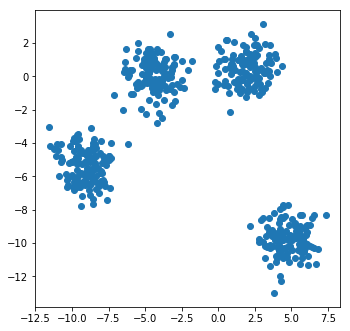

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers = 4, random_state=random_state)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Exercise 2. Market Basket Analysis and A prior Algorithm

In [6]:

import scipy.io as sio
Market_data = sio.loadmat('Market.mat')

There are $100$ customers and $20$ items in this dataset and each item has been already encoded using a binary variable indicating whether customer $i$ purchased the item or not. To code the a priori algorithm, we will rely on the following steps  (see [Introduction to Data Mining](https://www-users.cs.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf) for details)

__Step 1. ItemSet Generation.__ The general pseudo code for the itemset generation part of the A priori algorithm is given below. 

k=1
F[1] = all frequent 1-itemsets
while F[k] != Empty Set:
    k = k+1
    
Step I.  Candidate Itemsets Generation and Pruning

    C[k] = candidate itemsets generated by F[k-1]

Step II. prune the set of candidate itemsets.

    C[k] = prune(C[k])
    
Step III Support Counting

    for transaction t in T:
        C[t] = subset(C[k], t)     # Identify all candidates that belong to t
        for candidate itemset c in C[t]:
            support_count[c] += 1  # Increment support count
    
    F[k] = {c | c in C[k] and support_count[c]>=N*minsup}

return F[k] for all values of k

__Step 2. Frequent ItemSet generation__  

An easy (although slightly suboptimal) approach to generate the candidate itemset of size $k$ is to extend all frequent itemsets of size $k-1$ with the frequent size $1$ item sets that do not appear in F[k-1]. We will code this approach below.

In [ ]:
def frequent_k(list_frequent_Kminus1, list_frequent_1):
    
    '''should return the set of all candidate size k itemsets generated by adding of the size 1 
    frequent itemsets to the frequent size k-1 itemsets.'''
    
    
    
    return list_frequent_K

__Step 3. ItemSet prunning.__

Before starting to count the support of the size k itemsets and only retaining those whose support is above the threshold, there is an additional (relatively easy) step which we can apply to further reduce the number of such subsets. Indeed, among those subsets of size $k$ since we are dealing with frequent subsets, every subset of size $k-1$ must be frequent as well. We can thus already remove all the size $k$ itemsets that we generated above for which any of the size $k-1$ do not have a sufficient support ($t$ if we take the support to be constant across each itemset size)

In [ ]:
def prune(list_frequent_K, list_frequent_Kminus1):
    
    '''should prune the set of size k cadidate itemsets and return only those sets 
    whose size k-1 itemsets are among the list of frequent size k-1 itemsets'''
    
    
    return pruned_list_K


### Bonus. 

Complete the A priori algorithm by generating the set of frequent rules (see Algorithm5.2 in [Introduction to Data Mining](https://www-users.cs.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf))

### Exercise 3. K means and Hierarchical clustering for stock correlation 

Scikit learn comes with a collection of clustering tools. In this first exercise, we will start by loading data associated to a collection of stocks. The two variables 'companies' and 'movements' and 'stock_values' below respectively contain a list of the NYSE companies we will analyze in this exercise and the corresponding list of time evolution of the stocks corresponding to those companies. Print and/or plot a few of those values below.  

In [ ]:
import pandas as pd

fn = 'company-stock-movements-2010-2015.csv'
stocks_df = pd.read_csv(fn, index_col=0)

companies = list(stocks_df.index)
stock_values = stocks_df.values


We will use the two main clustering approaches introduced in class. Display the results using the lines below. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering






### Exercise 4. Principal Component Analysis

principal component analysis belongs to a class of unsupervised methods known as dimension reduction methods. The idea is that we want to capture the dimensions that best represent the data. This can then teach us that our prototypes can be best represented by retaining only those particular dimensions. Once we have extracted the interesting dimensions, we can then apply any regular learning algorithm on the dataset (as we did for the face recognition example). 

To capture the representative dimensions in the dataset, we look for the solution to the following problem

$$\min_{\mu, \left\{\lambda^{(i)}\right\}_i, \mathbf{V}} \sum_{i=1}^N \|\mathbf{x}^{(i)} - \mathbf{V}\mathbf{\lambda}^{(i)}|$$

That is we want to learn a smaller ($q<p$) number of vectors that capture most of the data. If we take those vectors, we want the approximation $\mathbf{x}^{(i)} = \sum_{q=1}^{Q}\lambda_q\mathbf{v}_q$ to be as accurate as possible, knowing that those $q$ remain the same through the dataset (i.e $\mathbf{V}$ does not depend on $(i)$). 

Each of the solutions $\mathbf{\mu}$, $\lambda^{(i)}$ in this problem can be computed efficiently as follows. By computing the derivatives and setting them to $0$, one can prove (exercise) that the solution for each parameter is given by

$$\mathbf{\mu} = \frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)}\quad \text{(empirical average)}$$

$$\lambda^{(i)} = \mathbf{V}^T(\mathbf{x}^{(i)} - \mathbf{\mu})\quad \text{(projection of the prototypes onto the vectors $\mathbf{V}_q$)}$$

Then if we substitute those values in the original minimization problem, we get 

$$\min_{\mathbf{V}_q} \sum_{i=1}^N \|(\mathbf{x}^{(i)} - \mathbf{\mu}) - \mathbf{V}_q\mathbf{V}_q^T(\mathbf{x}^{(i)} - \mathbf{\mu})\|^2$$

One can show that this problem is solved by taking the singular value decomposition of $\mathbf{X}$, $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$. If the prototypes are encoded by the rows of $\mathbf{X}$, then the matrix $\mathbf{V}_q$ is obtained by retaining the first $q$ rows of $\mathbf{V}^T$ (equivalently the first $q$ columns of $\mathbf{V}$).  

#### Exercise 4. 

Consider the dataset below which was generated a a noisy version of a plane. The points are thus approximately living in a $2D$ space but when we get the data, this intrinsic dimension is hidden. Use the PCA function from scikit learn first and then the singular value decomposition of the matrix of prototypes then to learn the principal components of the dataset. Plot those components using the arrow function. Then compute the projection of each o fthe protoypes on the 2D plane. 

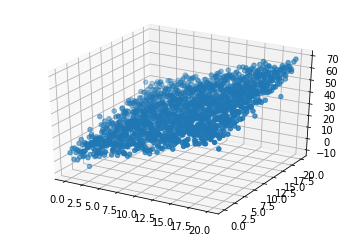

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 40)
y = np.linspace(0, 20, 40)

xx, yy = np.meshgrid(x, y)

zz = 2*xx + yy + 3

zz = zz + np.random.normal(0, 5, np.shape(zz))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, zz)
plt.show()

X = np.vstack((np.vstack((xx.flatten(), yy.flatten())), zz.flatten()))
X = X.T
